# GRNimmuneClock Tutorial

This notebook demonstrates how to use the GRNimmuneClock package to predict biological age from immune cell gene expression data.

## Prerequisites

### 1. Create a Fresh Python Environment

First, create a fresh Python 3.11 environment:


In [29]:
# Environment setup (run in terminal before opening this notebook):
# conda create -n grnimmuneclock python=3.11 -y
# conda activate grnimmuneclock
# pip install grnimmuneclock

print("✓ Make sure you created and activated the 'grnimmuneclock' environment")
print("  Run in terminal: conda create -n grnimmuneclock python=3.11 -y")
print("                   conda activate grnimmuneclock")
print("                   pip install grnimmuneclock")

✓ Make sure you created and activated the 'grnimmuneclock' environment
  Run in terminal: conda create -n grnimmuneclock python=3.11 -y
                   conda activate grnimmuneclock
                   pip install grnimmuneclock


## Import Libraries

In [1]:
import grnimmuneclock
from grnimmuneclock import AgingClock, load_example_data
import grnimmuneclock.plotting as gplot
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt

print(f"GRNimmuneClock version: {grnimmuneclock.__version__}")

GRNimmuneClock version: 1.0.0


## 1. Load Example Data

Load the included example dataset:

In [2]:
# Load example data
adata = load_example_data()

print(f"Loaded data: {adata.n_obs} samples, {adata.n_vars} genes")
print(f"Cell type: {adata.obs['cell_type'].unique()}")
print(f"Actual age: {adata.obs['age'].values[0]}")
print(f"\nFirst 5 genes: {list(adata.var_names[:5])}")

Loaded data: 1 samples, 11198 genes
Cell type: ['CD4T']
Categories (1, object): ['CD4T']
Actual age: 73.0

First 5 genes: ['LINC01409', 'LINC01128', 'FAM41C', 'NOC2L', 'HES4']


## 2. Load Aging Clock Model

Load a pre-trained model for CD4T cells:

In [3]:
# Load CD4T aging clock
clock_cd4t = AgingClock(cell_type='CD4T')

print(f"Loaded {clock_cd4t.cell_type} aging clock")
print(f"Number of features: {len(clock_cd4t.feature_names)}")
print(f"\nFirst 10 features: {clock_cd4t.feature_names[:10]}")

Loaded CD4T aging clock
Number of features: 1395

First 10 features: ['LGALS9' 'KLF10' 'ITGA6' 'SFPQ' 'CHMP1B' 'PPA1' 'GPR15' 'SP110' 'RGS10'
 'CAPZB']


## 3. Predict Biological Age

Use the aging clock to predict biological age:

In [4]:
# Predict age
adata_predicted = clock_cd4t.predict(adata)

# Show results
print("Prediction Results:")
print(f"Actual age: {adata_predicted.obs['age'].values[0]:.1f} years")
print(f"Predicted age: {adata_predicted.obs['predicted_age'].values[0]:.1f} years")
print(f"Age acceleration: {adata_predicted.obs['age_acceleration'].values[0]:.1f} years")

# Display prediction dataframe
adata_predicted.obs[['age', 'predicted_age', 'age_acceleration', 'cell_type']]

Prediction Results:
Actual age: 73.0 years
Predicted age: 76.8 years
Age acceleration: 3.8 years


,age,predicted_age,age_acceleration,cell_type
981,73.0,76.751889,3.751889,CD4T


## 4. Load and Test CD8T Model

Try the CD8T aging clock:

In [5]:
# Load CD8T aging clock
clock_cd8t = AgingClock(cell_type='CD8T')

print(f"Loaded {clock_cd8t.cell_type} aging clock")
print(f"Number of features: {len(clock_cd8t.feature_names)}")

Loaded CD8T aging clock
Number of features: 2790


## 5. Load Your Own Data

You can also load your own AnnData file:

In [6]:
# Example: Load your own data
# Just load your AnnData object - the aging clock handles everything else!

# Option 1: Load from H5AD file
# adata_custom = ad.read_h5ad('/path/to/your/data.h5ad')

# Option 2: Create from expression matrix
# import pandas as pd
# expression_df = pd.read_csv('/path/to/expression.csv', index_col=0)  # genes as rows, samples as columns
# adata_custom = ad.AnnData(X=expression_df.T.values)  # Transpose: samples as rows, genes as columns
# adata_custom.var_names = expression_df.index  # gene names
# adata_custom.obs_names = expression_df.columns  # sample names
# adata_custom.obs['age'] = [25, 30, 45, 60, 75]  # Add actual ages if known (optional)

# Predict age - that's it!
# e.g. 
# adata = ad.read_h5ad('../base_folder//datasets/bulk/data1_bulk.h5ad')
# adata = adata[adata.obs['cell_type'] == 'CD8T']
# adata_predicted = clock_cd8t.predict(adata)
# print(adata_predicted.obs[['age', 'predicted_age', 'age_acceleration']])

print("=" * 60)
print("To use your own data, uncomment and modify the code above.")
print("=" * 60)
print("\nData Requirements:")
print("  ✓ Gene expression matrix in adata.X")
print("  ✓ Gene symbols in adata.var_names")
print("  ✓ Optional: actual ages in adata.obs['age'] for validation")
print("\nThe aging clock automatically:")
print("  • Aligns your genes to the model's feature space")
print("  • Handles missing genes (fills with zeros)")
print("  • Applies StandardScaler (trained during model creation)")
print("  • Works with both raw counts and normalized data")
print("\n⚠️  No manual preprocessing needed - just pass your AnnData!")


To use your own data, uncomment and modify the code above.

Data Requirements:
  ✓ Gene expression matrix in adata.X
  ✓ Gene symbols in adata.var_names
  ✓ Optional: actual ages in adata.obs['age'] for validation

The aging clock automatically:
  • Aligns your genes to the model's feature space
  • Handles missing genes (fills with zeros)
  • Applies StandardScaler (trained during model creation)
  • Works with both raw counts and normalized data

⚠️  No manual preprocessing needed - just pass your AnnData!


## 7. Feature Importance

Examine which genes contribute most to age prediction:

In [7]:
# Get feature importance
importance_df = clock_cd4t.get_feature_importance(top_n=20)

print("Top 20 genes contributing to CD4T aging clock:")
importance_df

Top 20 genes contributing to CD4T aging clock:


,feature,coefficient
0,TSHZ2,0.851558
1,C1orf162,0.844590
2,LRRN3,-0.776105
3,AUTS2,-0.756768
4,IGFBP3,0.714286
5,HLA-DPB1,0.627433
6,AFF3,-0.627411
7,CD70,0.603124
8,SOX4,-0.559675
9,FAM13A,0.550166


## 8. Plot Feature Importance

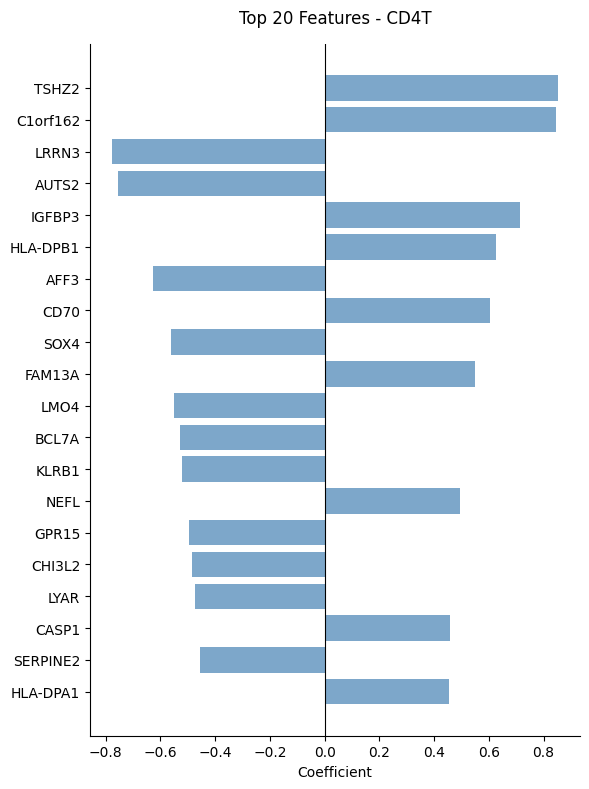

In [8]:
# Visualize feature importance
fig = gplot.plot_feature_importance(clock_cd4t, top_n=20)
plt.tight_layout()
plt.show()

## 10. Gene Regulatory Network Analysis

Explore the underlying gene regulatory network (GRN) that informs the aging clock features.

In [9]:
# Load consensus GRN for CD4T cells
from grnimmuneclock import load_consensus_grn

grn_cd4t = load_consensus_grn('CD4T')

print(f"Consensus GRN for CD4T:")
print(f"  Total regulatory links: {len(grn_cd4t):,}")
print(f"  Number of TFs: {grn_cd4t['source'].nunique()}")
print(f"  Number of target genes: {grn_cd4t['target'].nunique()}")
print(f"\nSample of regulatory links:")
grn_cd4t.head(10)

Consensus GRN for CD4T:
  Total regulatory links: 12,084
  Number of TFs: 164
  Number of target genes: 1429

Sample of regulatory links:


,source,target,weight
0,AEBP1,AHNAK,-1.046471
1,AEBP1,AIF1,0.381890
2,AEBP1,B2M,-1.280720
3,AEBP1,CCR7,0.461506
4,AEBP1,IL32,-0.969418
5,AEBP1,KLRB1,-0.906780
6,AEBP1,LEF1,0.480649
7,AEBP1,S100A11,-1.007814
8,AEBP1,S100A4,-1.243634
9,AEBP1,SH3BGRL3,-1.128080


### TF Regulon Sizes

Examine which transcription factors regulate the most target genes:

Top 10 TFs by number of targets:
source
KLF6     914
PRDM1    544
LEF1     530
TCF7     435
RORA     408
GATA3    404
SATB1    370
MAF      368
FOXP3    320
BACH2    282
Name: target, dtype: int64


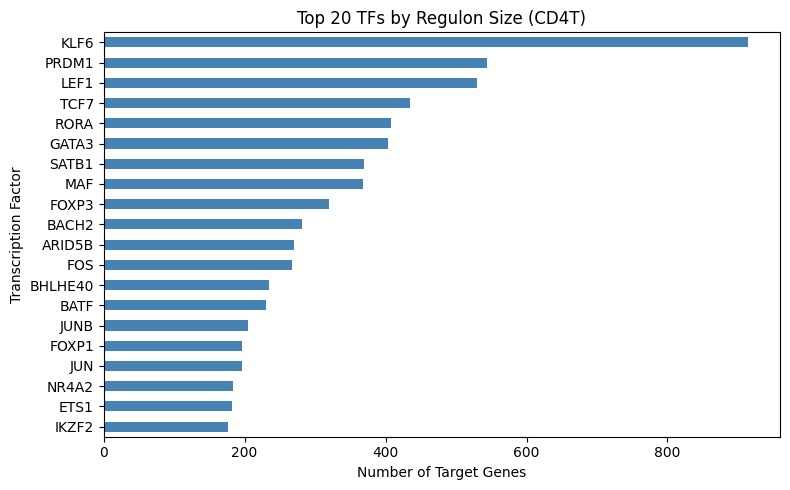

In [10]:
# Count targets per TF
tf_regulon_sizes = grn_cd4t.groupby('source')['target'].nunique().sort_values(ascending=False)

print("Top 10 TFs by number of targets:")
print(tf_regulon_sizes.head(10))

# Visualize top TFs
fig, ax = plt.subplots(figsize=(8, 5))
tf_regulon_sizes.head(20).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Number of Target Genes')
ax.set_ylabel('Transcription Factor')
ax.set_title('Top 20 TFs by Regulon Size (CD4T)')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Feature Overlap Between Cell Types

Compare which features are shared between CD4T and CD8T aging clocks:

Feature overlap between CD4T and CD8T:
  CD4T total features: 1395
  CD8T total features: 2790
  Shared features: 1147 (82.2% of CD4T)
  CD4T-specific: 248
  CD8T-specific: 1643


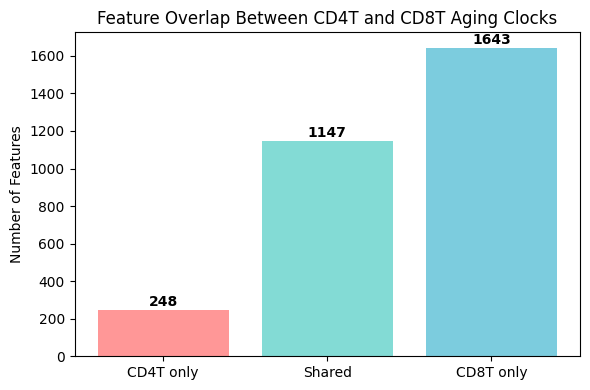


Sample of shared features: [np.str_('POMP'), np.str_('RASGRP2'), np.str_('CORO1A'), np.str_('RAP1GDS1'), np.str_('PFN1'), np.str_('SYT11'), np.str_('LINC-PINT'), np.str_('PPP1R12A'), np.str_('CHI3L2'), np.str_('NUMA1')]


In [11]:
# Get features for both cell types
cd4t_features = set(clock_cd4t.feature_names)
cd8t_features = set(clock_cd8t.feature_names)

# Calculate overlap
shared_features = cd4t_features & cd8t_features
cd4t_only = cd4t_features - cd8t_features
cd8t_only = cd8t_features - cd4t_features

print(f"Feature overlap between CD4T and CD8T:")
print(f"  CD4T total features: {len(cd4t_features)}")
print(f"  CD8T total features: {len(cd8t_features)}")
print(f"  Shared features: {len(shared_features)} ({100*len(shared_features)/len(cd4t_features):.1f}% of CD4T)")
print(f"  CD4T-specific: {len(cd4t_only)}")
print(f"  CD8T-specific: {len(cd8t_only)}")

# Visualize with Venn diagram (simple bar chart alternative)
fig, ax = plt.subplots(figsize=(6, 4))
categories = ['CD4T only', 'Shared', 'CD8T only']
counts = [len(cd4t_only), len(shared_features), len(cd8t_only)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax.bar(categories, counts, color=colors, alpha=0.7)
ax.set_ylabel('Number of Features')
ax.set_title('Feature Overlap Between CD4T and CD8T Aging Clocks')
for i, v in enumerate(counts):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nSample of shared features: {list(shared_features)[:10]}")

### TF Activity in Aging

Examine which transcription factors regulate important aging genes:

TFs regulating top aging genes:
source
KLF6       62
LEF1       57
TCF7       47
PRDM1      47
SATB1      35
RORA       31
BACH2      30
GATA3      30
FOXP3      29
BHLHE40    26
Name: target, dtype: int64


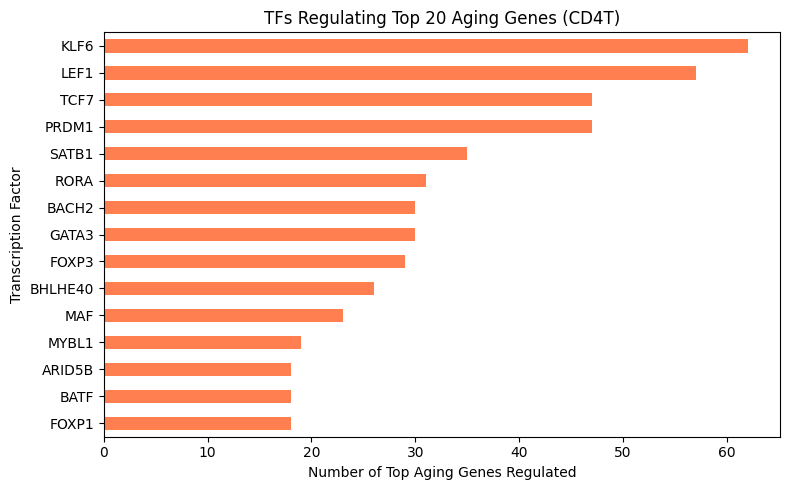

In [12]:
# Get top aging genes from clock
top_genes_df = clock_cd4t.get_feature_importance(top_n=100)
top_aging_genes = top_genes_df['feature'].tolist()

# Find TFs that regulate these aging genes
tfs_regulating_aging = grn_cd4t[grn_cd4t['target'].isin(top_aging_genes)]

# Count how many top aging genes each TF regulates
tf_aging_counts = tfs_regulating_aging.groupby('source')['target'].nunique().sort_values(ascending=False)

print(f"TFs regulating top aging genes:")
print(tf_aging_counts.head(10))

# Visualize
if len(tf_aging_counts) > 0:
    fig, ax = plt.subplots(figsize=(8, 5))
    tf_aging_counts.head(15).plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Number of Top Aging Genes Regulated')
    ax.set_ylabel('Transcription Factor')
    ax.set_title('TFs Regulating Top 20 Aging Genes (CD4T)')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("\nNo TFs found regulating the top aging genes in the consensus GRN.")

### Network Statistics

Explore the structure of the GRN:

GRN Network Statistics:
  Average TFs per target gene: 8.46
  Max TFs regulating a gene: 114
  Average targets per TF: 73.68
  Max targets for a TF: 914


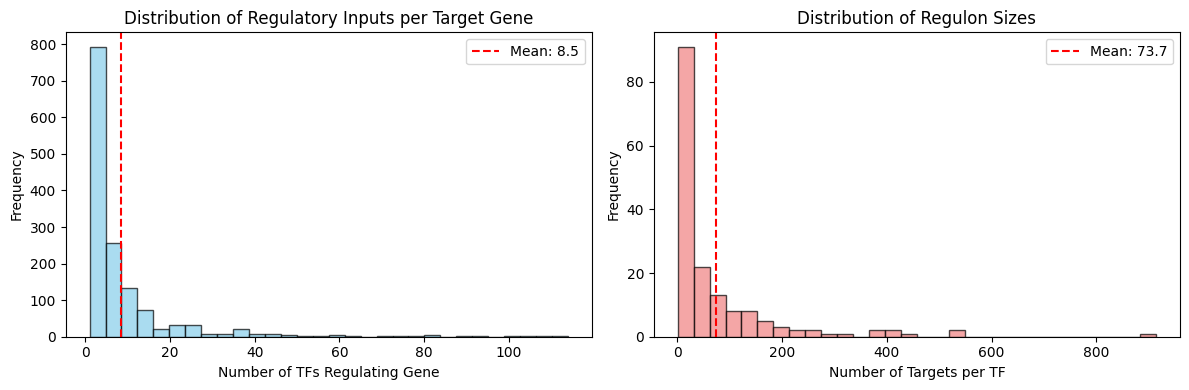

In [13]:
# Calculate network statistics
targets_per_gene = grn_cd4t.groupby('target')['source'].nunique()

print("GRN Network Statistics:")
print(f"  Average TFs per target gene: {targets_per_gene.mean():.2f}")
print(f"  Max TFs regulating a gene: {targets_per_gene.max()}")
print(f"  Average targets per TF: {tf_regulon_sizes.mean():.2f}")
print(f"  Max targets for a TF: {tf_regulon_sizes.max()}")

# Distribution of regulatory inputs
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of TFs per target
axes[0].hist(targets_per_gene, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of TFs Regulating Gene')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Regulatory Inputs per Target Gene')
axes[0].axvline(targets_per_gene.mean(), color='red', linestyle='--', label=f'Mean: {targets_per_gene.mean():.1f}')
axes[0].legend()

# Distribution of targets per TF
axes[1].hist(tf_regulon_sizes, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Number of Targets per TF')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Regulon Sizes')
axes[1].axvline(tf_regulon_sizes.mean(), color='red', linestyle='--', label=f'Mean: {tf_regulon_sizes.mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## 11. Pathway Enrichment Analysis (Optional)

Analyze biological pathways enriched in aging clock features.

**Note**: This section requires the `gseapy` package. Install it with:
```bash
pip install gseapy
```

Found 7 significantly enriched pathways (FDR < 0.05):

                        Term  Adjusted P-value  \
0                    Hypoxia          0.002234   
1       IL-2/STAT5 Signaling          0.005746   
2  Interferon Gamma Response          0.005746   
3  Interferon Alpha Response          0.012139   
4            Apical Junction          0.018835   
5           mTORC1 Signaling          0.018835   
6                  Apoptosis          0.042368   

                                        Genes  
0  ISG20;PLAC8;TPI1;IGFBP3;BHLHE40;BCL2;PRKCA  
1      EOMES;PLSCR1;BHLHE40;BCL2;CST7;TNFRSF4  
2         ZBP1;ISG20;PLSCR1;AUTS2;CASP1;ISG15  
3                    ISG20;PLSCR1;CASP1;ISG15  
4                     CNN2;FYB1;EVL;VCL;SKAP2  
5                TBK1;TPI1;BHLHE40;CTSC;SKAP2  
6                     ISG20;LGALS3;PRF1;CASP1  


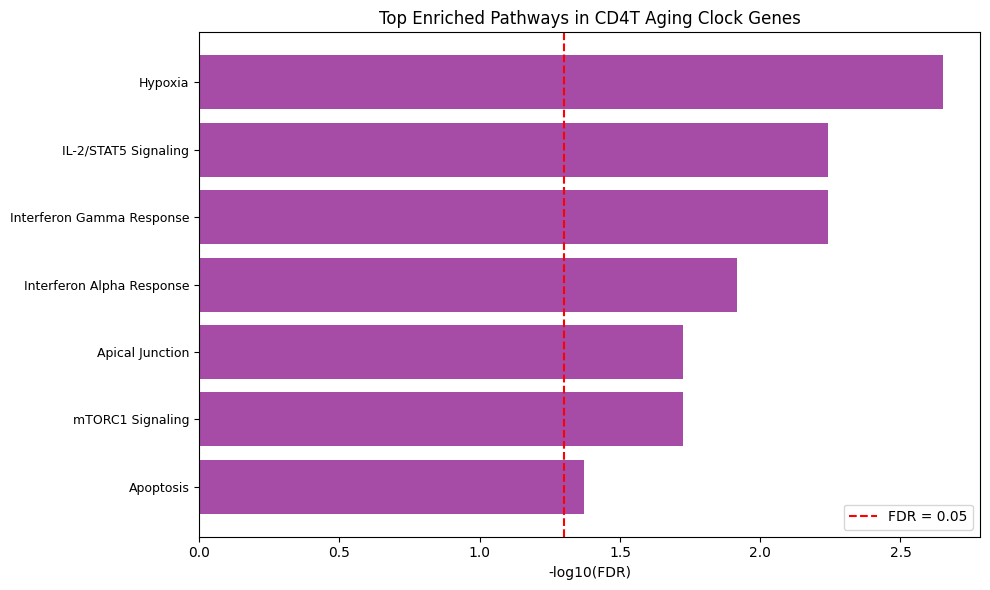

In [16]:
try:
    import gseapy as gp
    import numpy as np
    
    # Get top aging genes
    top_genes = clock_cd4t.get_feature_importance(top_n=100)['feature'].tolist()
    
    # Run enrichment analysis
    enr = gp.enrichr(
        gene_list=top_genes,
        gene_sets='MSigDB_Hallmark_2020',
        organism='human',
        outdir=None,
        cutoff=0.05
    )
    
    # Get results
    results = enr.res2d
    results = results[results['Adjusted P-value'] < 0.05].copy()
    results['neg_log10_pval'] = -np.log10(results['Adjusted P-value'])
    
    if len(results) > 0:
        print(f"Found {len(results)} significantly enriched pathways (FDR < 0.05):\n")
        print(results[['Term', 'Adjusted P-value', 'Genes']].head(10))
        
        # Visualize top pathways
        fig, ax = plt.subplots(figsize=(10, 6))
        top_results = results.nsmallest(15, 'Adjusted P-value')
        ax.barh(range(len(top_results)), top_results['neg_log10_pval'], color='purple', alpha=0.7)
        ax.set_yticks(range(len(top_results)))
        ax.set_yticklabels([term[:50] for term in top_results['Term']], fontsize=9)
        ax.set_xlabel('-log10(FDR)')
        ax.set_title('Top Enriched Pathways in CD4T Aging Clock Genes')
        ax.invert_yaxis()
        ax.axvline(-np.log10(0.05), color='red', linestyle='--', label='FDR = 0.05')
        ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No significantly enriched pathways found.")
        
except ImportError:
    print("gseapy not installed. Skipping pathway enrichment analysis.")
    print("Install with: pip install gseapy")
except Exception as e:
    print(f"Pathway enrichment analysis failed: {e}")
    print("This is optional - continuing with tutorial...")

## 9. Model Metadata

View information about the trained models:

In [ ]:
# Load and display metadata
import json
from pathlib import Path

for cell_type in ['CD4T', 'CD8T']:
    metadata_file = Path(grnimmuneclock.__file__).parent / 'models' / cell_type / 'metadata.json'
    with open(metadata_file) as f:
        metadata = json.load(f)
    
    print(f"\n{cell_type} Model Metadata:")
    print(f"  Model type: {metadata['model_type']}")
    print(f"  Number of features: {metadata['n_features']}")
    print(f"  R² score: {metadata['performance']['r2']}")
    print(f"  Version: {metadata['version']}")


CD4T Model Metadata:
  Model type: Ridge Regression
  Number of features: 1395
  R² score: 0.87
  MAE: 5.2 years
  Version: 1.0.0

CD8T Model Metadata:
  Model type: Ridge Regression
  Number of features: 2790
  R² score: 0.85
  MAE: 5.8 years
  Version: 1.0.0
